In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import geopandas as gpd
import re
import datetime as dt
import seaborn as sns

2023 Dataset

In [2]:
bikeshare_2023 = pd.read_csv('bikeshare_2023.csv')
bikeshare_2023 = bikeshare_2023.rename(columns = {'ï»¿Trip Id':'trip id', 'Trip  Duration': 'trip duration','Start Station Id':'start station id','End Station Id':'end station id','User Type':'user type'})
bikeshare_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577456 entries, 0 to 577455
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          577456 non-null  int64  
 1   trip id             577456 non-null  int64  
 2   trip duration       577456 non-null  int64  
 3   start station id    577456 non-null  int64  
 4   Start Time          577456 non-null  object 
 5   Start Station Name  540508 non-null  object 
 6   end station id      577213 non-null  float64
 7   End Time            577456 non-null  object 
 8   End Station Name    539487 non-null  object 
 9   Bike Id             577456 non-null  int64  
 10  user type           577456 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 48.5+ MB


2018 -2022 datasets

In [3]:
bikeshare_2022 = pd.read_csv('bikeshare_2022.csv')
bikeshare_2021 = pd.read_csv('bikeshare_2021.csv')
bikeshare_2020 = pd.read_csv('bikeshare_2020.csv')
bikeshare_2019 = pd.read_csv('bikeshare_2019.csv')
bikeshare_2018 = pd.read_csv('bikeshare_2018.csv')

/var/folders/5j/22sv3wgn7k7cftl76slzc3900000gn/T/ipykernel_78614/2215666230.py:3: DtypeWarning: Columns (3,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  bikeshare_2020 = pd.read_csv('bikeshare_2020.csv')


2023

In [4]:
member_comp_2023 = bikeshare_2023.groupby('user type').agg({'trip id':'count'})
member_comp_2023.head()

,trip id
user type,
Annual Member,143722
Casual Member,433734


In [11]:
bikeshare_2023['month'] = pd.to_datetime(bikeshare_2023['Start Time']).dt.month
member_trend_2023 = bikeshare_2023.groupby(['month','user type']).agg({'trip id':'count'}).reset_index()
member_trend_2023

,month,user type,trip id
0,1,Annual Member,50000
1,1,Casual Member,130135
2,2,Annual Member,42761
3,2,Casual Member,130015
4,3,Annual Member,50961
5,3,Casual Member,173584


2022

In [18]:
bikeshare_2022 = bikeshare_2022.rename(columns = {'ï»¿Trip Id':'trip id', 'Trip  Duration': 'trip duration','Start Station Id':'start station id','End Station Id':'end station id','User Type':'user type'})
bikeshare_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620469 entries, 0 to 4620468
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   trip id             float64
 2   trip duration       int64  
 3   start station id    int64  
 4   Start Time          object 
 5   Start Station Name  object 
 6   end station id      float64
 7   End Time            object 
 8   End Station Name    object 
 9   Bike Id             int64  
 10  user type           object 
 11  Trip Id             float64
 12  month               int32  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 440.6+ MB


In [23]:
member_comp_2022 = bikeshare_2022.groupby('user type').agg({'trip id':'count'})

bikeshare_2022['month'] = pd.to_datetime(bikeshare_2022['Start Time']).dt.month
member_trend_2022 = bikeshare_2022.groupby(['month','user type']).agg({'trip id':'count'}).reset_index()
member_trend_2022

,month,user type,trip id
0,1,Annual Member,40470
1,1,Casual Member,16295
2,2,Annual Member,46550
3,2,Casual Member,20460
4,3,Annual Member,93264
5,3,Casual Member,58674
6,4,Annual Member,117480
7,4,Casual Member,128440
8,5,Annual Member,159584
9,5,Casual Member,345342


2021

In [22]:
bikeshare_2021 = bikeshare_2021.rename(columns = {'Trip Id':'trip id', 'Trip  Duration': 'trip duration','Start Station Id':'start station id','End Station Id':'end station id','User Type':'user type'})
bikeshare_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575182 entries, 0 to 3575181
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   trip id             float64
 2   trip duration       int64  
 3   start station id    int64  
 4   Start Time          object 
 5   Start Station Name  object 
 6   end station id      float64
 7   End Time            object 
 8   End Station Name    object 
 9   Bike Id             float64
 10  user type           object 
 11  trip id             float64
dtypes: float64(4), int64(3), object(5)
memory usage: 327.3+ MB


In [27]:
member_comp_2021 = bikeshare_2021.groupby('user type').agg({'trip id':'count'})
member_comp_2021

AttributeError: 'DataFrame' object has no attribute 'name'

In [28]:
bikeshare_2021['month'] = pd.to_datetime(bikeshare_2021['Start Time']).dt.month
member_trend_2021 = bikeshare_2021.groupby(['month','user type']).agg({'trip id':'count'}).reset_index()
member_trend_2021

AttributeError: 'DataFrame' object has no attribute 'name'

2020

In [30]:
bikeshare_2020 = bikeshare_2020.rename(columns = {'Trip Id':'trip id', 'Trip  Duration': 'trip duration','Start Station Id':'start station id','End Station Id':'end station id','User Type':'user type'})
bikeshare_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911308 entries, 0 to 2911307
Data columns (total 11 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   trip id             int64 
 2   trip duration       int64 
 3   start station id    object
 4   Start Time          object
 5   Start Station Name  object
 6   end station id      object
 7   End Time            object
 8   End Station Name    object
 9   Bike Id             object
 10  user type           object
dtypes: int64(3), object(8)
memory usage: 244.3+ MB


In [31]:
member_comp_2020 = bikeshare_2020.groupby('user type').agg({'trip id':'count'})
member_comp_2020

,trip id
user type,
Annual Member,1872109
Casual Member,1038950


In [35]:
bikeshare_2020.head()

,Unnamed: 0,trip id,trip duration,start station id,Start Time,Start Station Name,end station id,End Time,End Station Name,Bike Id,user type
0,0,7334128,648,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271.0,01/01/2020 00:19,Yonge St / Alexander St - SMART,3104,Annual Member
1,1,7334129,419,7007,01/01/2020 00:10,College St / Huron St,7163.0,01/01/2020 00:17,Yonge St / Wood St,2126,Annual Member
2,2,7334130,566,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108.0,01/01/2020 00:22,Front St E / Cherry St,4425,Annual Member
3,3,7334131,1274,7333,01/01/2020 00:17,King St E / Victoria St,7311.0,01/01/2020 00:38,Sherbourne St / Isabella St,4233,Annual Member
4,4,7334132,906,7009,01/01/2020 00:19,King St E / Jarvis St,7004.0,01/01/2020 00:34,University Ave / Elm St,2341,Casual Member


In [51]:
bikeshare_2020 = bikeshare_2020.drop([298653])

KeyError: '[298653] not found in axis'

In [52]:
bikeshare_2020['month'] = pd.to_datetime(bikeshare_2020['Start Time'], format = 'mixed' ).dt.month

member_trend_2020 = bikeshare_2020.groupby(['month','user type']).agg({'trip id':'count'}).reset_index()
member_trend_2020

DateParseError: Unknown datetime string format, unable to parse: Gerrard St E / River St, at position 298653

2019

In [53]:
bikeshare_2019.head()

,Unnamed: 0,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,0,4581278,1547.0,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member
1,1,4581279,1112.0,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,2,4581280,589.0,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member
3,3,4581281,259.0,7012,01/01/2019 00:16,Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20,Bay St / College St (West Side) - SMART,283,Annual Member
4,4,4581282,281.0,7041,01/01/2019 00:19,Edward St / Yonge St,7257.0,01/01/2019 00:24,Dundas St W / St. Patrick St,1799,Annual Member


In [54]:
bikeshare_2019 = bikeshare_2019.rename(columns = {'Trip Id':'trip id', 'Trip  Duration': 'trip duration','Start Station Id':'start station id','End Station Id':'end station id','User Type':'user type'})
bikeshare_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439517 entries, 0 to 2439516
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   trip id             int64  
 2   trip duration       float64
 3   start station id    int64  
 4   Start Time          object 
 5   Start Station Name  object 
 6   end station id      float64
 7   End Time            object 
 8   End Station Name    object 
 9   Bike Id             int64  
 10  user type           object 
dtypes: float64(2), int64(4), object(5)
memory usage: 204.7+ MB


In [55]:
bikeshare_2019['month'] = pd.to_datetime(bikeshare_2019['Start Time'], format = 'mixed' ).dt.month

member_trend_2019 = bikeshare_2019.groupby(['month','user type']).agg({'trip id':'count'}).reset_index()
member_trend_2019

,month,user type,trip id
0,1,Annual Member,59520
1,1,Casual Member,1942
2,2,Annual Member,38971
3,2,Casual Member,1087
4,3,Annual Member,82200
5,3,Casual Member,5343
6,4,Annual Member,123931
7,4,Casual Member,21220
8,5,Annual Member,164632
9,5,Casual Member,49984


2018

In [56]:
bikeshare_2018.head()

,Unnamed: 0,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [57]:
bikeshare_2018['month'] = pd.to_datetime(bikeshare_2018['trip_start_time']).dt.month

member_trend_2018 = bikeshare_2018.groupby(['month','user_type']).agg({'trip_id':'count'}).reset_index()
member_trend_2018

,month,user_type,trip_id
0,1,Annual Member,42469
1,1,Casual Member,1390
2,2,Annual Member,47276
3,2,Casual Member,2455
4,3,Annual Member,78564
5,3,Casual Member,6405
6,4,Annual Member,82194
7,4,Casual Member,12589
8,5,Annual Member,160989
9,5,Casual Member,51761


<Axes: xlabel='month', ylabel='trip_id'>

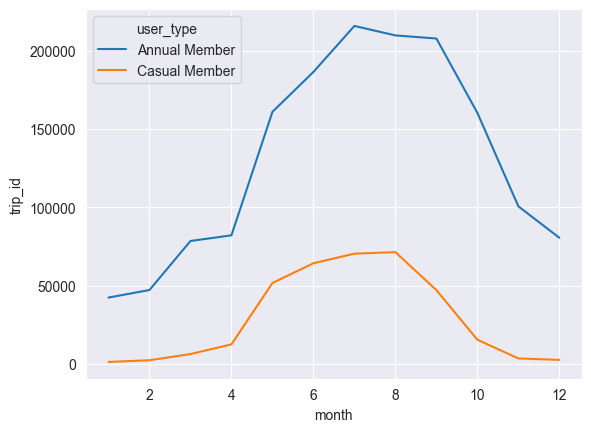

In [59]:
sns.lineplot(data = member_trend_2018,x = 'month',y = 'trip_id',hue = 'user_type')